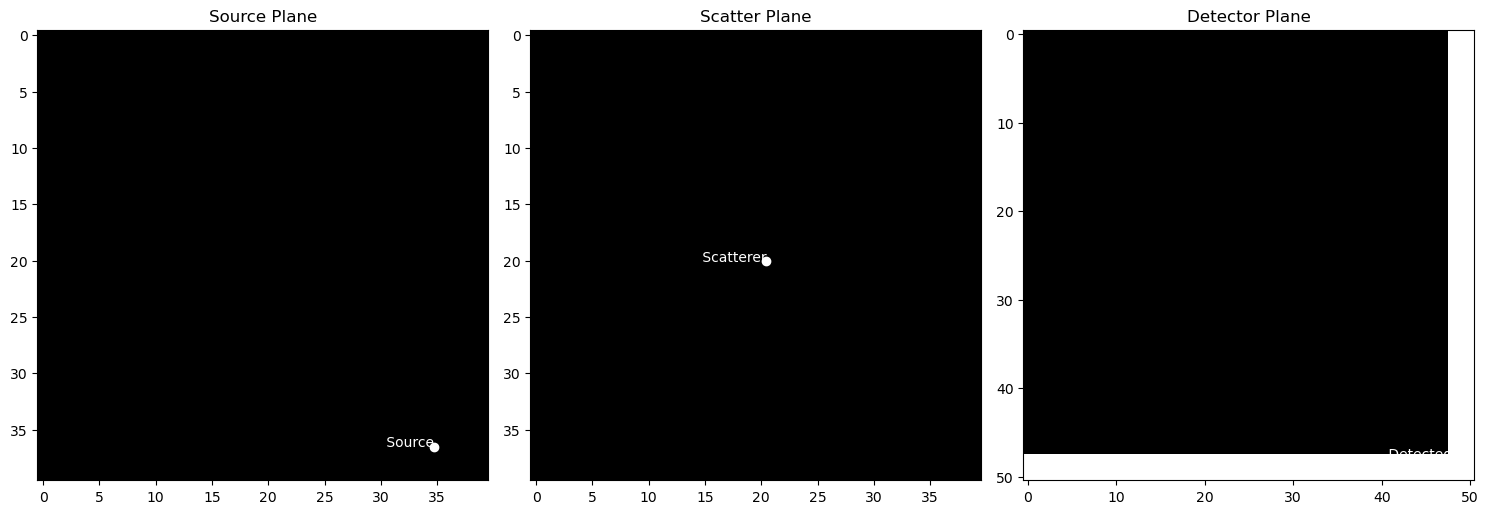

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_detector_position(scatter_point, angle_deg, plane_size_detector, distance_scatter_detector):
    """
    Calculate the position on the detector plane where a scattered photon might interact,
    based on the scattering angle and the distance to the detector. This function aims to
    conceptualize how the scattering angle might influence the interaction location on the detector.
    """
    # Convert angle from degrees to radians for calculation
    angle_rad = np.radians(angle_deg)
   
    # Assuming the detector is directly opposite the scatter point,
    # and use the angle to determine the lateral displacement on the detector plane
   
    # Assuming the distance to the detector affects the lateral displacement linearly
    lateral_displacement = distance_scatter_detector * np.tan(angle_rad)
   
    # Calculate the new x and y positions on the detector plane, considering the displacement
    detector_x = np.clip(scatter_point[0] + lateral_displacement, 0, plane_size_detector)
    detector_y = np.clip(scatter_point[1] + lateral_displacement, 0, plane_size_detector)
   
    return detector_x, detector_y

# Constants and setup
plane_size_source_scatter = 40  # mm
plane_size_detector = 48  # mm
distance_scatter_detector = 50  # mm (5 cm)
angle_deg = 30  # degrees

# Random points for source and scatterer on their respective planes
source_point = np.random.rand(2) * plane_size_source_scatter
scatter_point = np.random.rand(2) * plane_size_source_scatter

# Calculate the detector position using the new function
detector_position = calculate_detector_position(
    scatter_point, angle_deg, plane_size_detector, distance_scatter_detector
)

# Plotting with the new calculation for the detector position
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Source plane
axs[0].imshow(np.zeros((plane_size_source_scatter, plane_size_source_scatter)), cmap='gray')
axs[0].scatter(source_point[0], source_point[1], color='white')
axs[0].set_title('Source Plane')
axs[0].text(source_point[0], source_point[1], ' Source', color='white', ha='right')

# Scatter plane
axs[1].imshow(np.zeros((plane_size_source_scatter, plane_size_source_scatter)), cmap='gray')
axs[1].scatter(scatter_point[0], scatter_point[1], color='white')
axs[1].set_title('Scatter Plane')
axs[1].text(scatter_point[0], scatter_point[1], ' Scatterer', color='white', ha='right')

# Detector plane with new position calculation
axs[2].imshow(np.zeros((plane_size_detector, plane_size_detector)), cmap='gray')
axs[2].scatter(detector_position[0], detector_position[1], color='white')
axs[2].set_title('Detector Plane')
axs[2].text(detector_position[0], detector_position[1], ' Detected', color='white', ha='right')

#for ax in axs:
#    ax.axis('off')

plt.tight_layout()
plt.show()

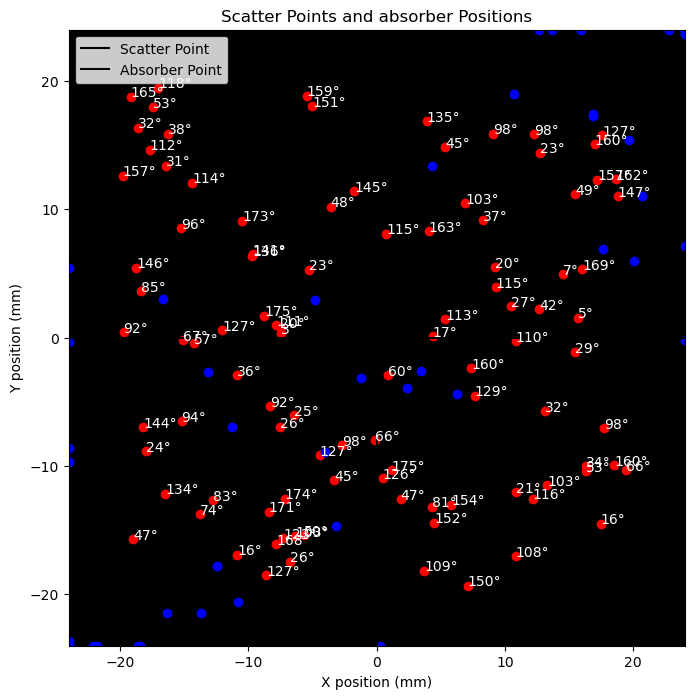

[(array([-5.01839525, 18.02857226]), 151, (-24.0, -9.686880316241812), 0.7857998915456891), (array([9.27975767, 3.94633937]), 115, (-24.0, -24.0), 0.7357286026353604), (array([-13.75925438, -13.76021919]), 74, (24.0, 24.0), 0.5863562797481653), (array([-17.67665551,  14.64704583]), 112, (-24.0, -24.0), 0.7289996748079424), (array([4.04460047, 8.32290311]), 163, (-11.24193360320466, -6.963630961091194), 0.7928914136913958), (array([-19.17662023,  18.79639409]), 165, (-24.0, 5.398934464923624), 0.7936958811699337), (array([ 13.29770563, -11.50643557]), 103, (-24.0, -24.0), 0.7056368618681235), (array([-12.72700131, -12.66381961]), 83, (24.0, 24.0), 0.6321440336990303), (array([-7.83031028,  0.99025727]), 111, (-24.0, -24.0), 0.7266455755142832), (array([-2.72219925, -8.35083439]), 98, (-24.0, -24.0), 0.6903355171025987), (array([  4.47411579, -14.42024557]), 152, (-22.111355794178753, -24.0), 0.7865450348519335), (array([-8.31421406, -5.34552627]), 92, (-24.0, -24.0), 0.669448110249085),

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_hit_position(scatter_point, angle_deg, plane_size_detector, distance_scatter_detector):
    """
    Calculate the position on the detector plane where a scattered photon might interact,
    based on the scattering angle and the distance to the detector.
    """
    angle_rad = np.radians(angle_deg)
    lateral_displacement = distance_absorber * np.tan(angle_rad)
    absorber_x = np.clip(scatter_point[0] + lateral_displacement, -absorber_size/2, absorber_size/2)
    absorber_y = np.clip(scatter_point[1] + lateral_displacement, -absorber_size/2, absorber_size/2)
    return absorber_x, absorber_y
def electron_energy(E, angle_deg):
    """
    Calculate the kinetic energy of the recoiling electron after Compton scattering.
    """
    mec2 = 0.511  # Rest mass energy of the electron in MeV
    angle_rad = np.radians(angle_deg)
    E_prime = E / (1 + (E / mec2) * (1 - np.cos(angle_rad))) #E_prime = energy after scattering
    Ke = E - E_prime #  Ke = energy of the recoiling electron
    return Ke
# Constants
plane_size = 40  # mm
absorber_size = 48  # mm
distance_absorber = 50  # mm
num_points = 100  # Number of random points to generate
E = 1 # MeV energy of gamma rays
# Data storage
data = []

# Generate random points and angles
np.random.seed(42)  # For reproducibility
scatter_points = np.random.rand(num_points, 2) * plane_size - plane_size/2
theta_values = np.random.randint(0, 180, size=num_points)  # Random angles between 10 and 180 degrees

# Calculate detector positions and store data
for i in range(num_points):
    scatter_point = scatter_points[i]
    angle_deg = theta_values[i]
    absorber_position = calculate_hit_position(scatter_point, angle_deg, absorber_size, distance_absorber)
    e_energy = electron_energy(E, angle_deg)
    data.append((scatter_point, angle_deg, absorber_position, e_energy))

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim([-absorber_size / 2, absorber_size / 2])
ax.set_ylim([-absorber_size / 2, absorber_size / 2])
ax.set_title('Scatter Points and Absorber Positions')
ax.set_xlabel('X position (mm)')
ax.set_ylabel('Y position (mm)')
ax.axhline(y=0, color='k')  # X-axis
ax.axvline(x=0, color='k')  # Y-axis
# Plotting
#fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(np.zeros((absorber_size,absorber_size)), cmap='gray', extent=[-absorber_size/2, absorber_size/2, -absorber_size/2, absorber_size/2])
for scatter_point, angle_deg, absorber_position, e_energy in data:
    ax.scatter(scatter_point[0], scatter_point[1], color='red', label='Scatter Point')
    ax.scatter(absorber_position[0], absorber_position[1], color='blue', label='Detector Point')
    ax.text(scatter_point[0], scatter_point[1], f'{angle_deg}°', color='white')

ax.set_title('Scatter Points and absorber Positions')
ax.set_aspect('equal')
plt.legend(["Scatter Point", "Absorber Point"], loc="upper left")
plt.show()
print(data)

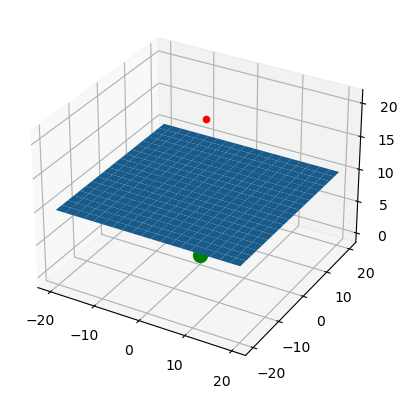

In [6]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters of the simulation
E_gamma = .511 # MeV
# Since we dont know the detector dimensions, assume the detected point source as a point on the detector plane.
# the source is a dot so the detector reads a dot.assume the thichness is 0.1 cm
detector_thickness = 0.1 # cm
n_photons = 1000 # Number of photons to simulate
scatter_screen_dimensions = [40, 40, 1] # grid
screen_position = np.array([0, 0, 10]) # cm

   
# Generate a random position for the source
source_position = np.random.rand(3) + 2*screen_position # + 2*screen_position ensures source is on other side

# Plot the source position, detector position, scattering material, and path of the photons
fig = plt.figure()
axis = fig.add_subplot(111, projection='3d')
# 3D projection to show geometry of set-up
# Plot the source position
axis.scatter(source_position[0], source_position[1], source_position[2], color='red', label='Source')

# Plot the detector position
detector_position = np.array([0, 0, 0]) # Detector is at (0,0,0) this is very helpful would recommend for everyone else to do this
axis.scatter(detector_position[0], detector_position[1], detector_position[2], color='green', s=100)

# Plot the scattering material position
x = np.linspace(screen_position[0] - scatter_screen_dimensions[0]/2, screen_position[0] + scatter_screen_dimensions[0]/2, 20)
y = np.linspace(screen_position[1] - scatter_screen_dimensions[1]/2, screen_position[1] + scatter_screen_dimensions[1]/2, 20)
X, Y = np.meshgrid(x, y)
Z = np.full((20, 20), screen_position[2])
axis.plot_surface(X, Y, Z)


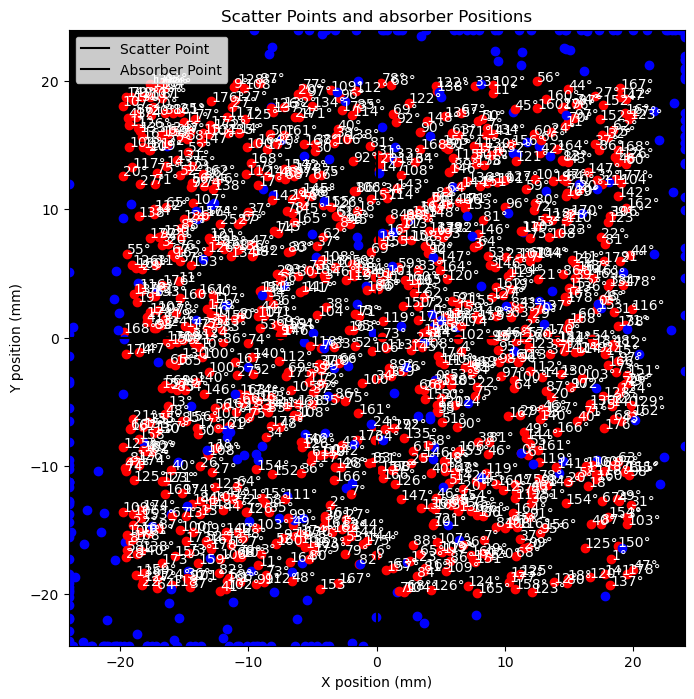

[(array([-5.01839525, 18.02857226]), 134, (-24.0, -24.0)), (array([9.27975767, 3.94633937]), 162, (-6.966227139189119, -12.299645443763858)), (array([-13.75925438, -13.76021919]), 13, (-2.2158448260243837, -2.216809630273737)), (array([-17.67665551,  14.64704583]), 119, (-24.0, -24.0)), (array([4.04460047, 8.32290311]), 137, (-24.0, -24.0)), (array([-19.17662023,  18.79639409]), 79, (24.0, 24.0)), (array([ 13.29770563, -11.50643557]), 143, (-24.0, -24.0)), (array([-12.72700131, -12.66381961]), 105, (-24.0, -24.0)), (array([-7.83031028,  0.99025727]), 69, (24.0, 24.0)), (array([-2.72219925, -8.35083439]), 43, (24.0, 24.0)), (array([  4.47411579, -14.42024557]), 72, (24.0, 24.0)), (array([-8.31421406, -5.34552627]), 44, (24.0, 24.0)), (array([-1.75720063, 11.40703846]), 106, (-24.0, -24.0)), (array([-12.01304871,   0.56937754]), 83, (24.0, 24.0)), (array([  3.69658275, -18.14198349]), 81, (24.0, 24.0)), (array([  4.30179408, -13.17903505]), 106, (-24.0, -24.0)), (array([-17.39793628,  17

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_hit_position(scatter_point, angle_deg, plane_size_detector, distance_scatter_detector):
    """
    Calculate the position on the detector plane where a scattered photon might interact,
    based on the scattering angle and the distance to the detector.
    """
    angle_rad = np.radians(angle_deg)
    lateral_displacement = distance_absorber * np.tan(angle_rad)
    absorber_x = np.clip(scatter_point[0] + lateral_displacement, -absorber_size/2, absorber_size/2)
    absorber_y = np.clip(scatter_point[1] + lateral_displacement, -absorber_size/2, absorber_size/2)
    return absorber_x, absorber_y

#Constants
plane_size = 40  # mm
absorber_size = 48  # mm
distance_absorber = 50  # mm
num_points = 1000  # Number of random points to generate
h = 4.135667696e-18;      # Planck's constant (keV.s)
m_e = .511;    # Electron mass (MeV/c^2)
#c = 3.0e8;          # Speed of light (m/s)
E_gamma = 1     # MeV

#Data storage
data = []

#Generate random points and angles
np.random.seed(42)  # For reproducibility
scatter_points = np.random.rand(num_points, 2) * plane_size - plane_size/2
theta_values = np.random.randint(0, 180, size=num_points)  # Random angles between 10 and 180 degrees

#Calculate detector positions and store data
for i in range(num_points):
    scatter_point = scatter_points[i]
    angle_deg = theta_values[i]
    absorber_position = calculate_hit_position(scatter_point, angle_deg, absorber_size, distance_absorber)
    #delta_E[i] = E_gamma.*(1 - (1 ./ (1+(E_gamma ./ (m_e)) .* (1 - cos(theta[i])))))
    data.append((scatter_point, angle_deg, absorber_position))

#Plotting
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim([-absorber_size / 2, absorber_size / 2])
ax.set_ylim([-absorber_size / 2, absorber_size / 2])
ax.set_title('Scatter Points and Absorber Positions')
ax.set_xlabel('X position (mm)')
ax.set_ylabel('Y position (mm)')
ax.axhline(y=0, color='k')  # X-axis
ax.axvline(x=0, color='k')  # Y-axis

#Plotting
#fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(np.zeros((absorber_size,absorber_size)), cmap='gray', extent=[-absorber_size/2, absorber_size/2, -absorber_size/2, absorber_size/2])
for scatter_point, angle_deg, absorber_position in data:
    ax.scatter(scatter_point[0], scatter_point[1], color='red', label='Scatter Point')
    ax.scatter(absorber_position[0], absorber_position[1], color='blue', label='Detector Point')
    ax.text(scatter_point[0], scatter_point[1], f'{angle_deg}°', color='white')

ax.set_title('Scatter Points and absorber Positions')
ax.set_aspect('equal') 
plt.legend(["Scatter Point", "Absorber Point"], loc="upper left")
plt.show()

print(data)




In [11]:

# Plotting the scatter plot of angles vs. electron energies
plt.figure(figsize=(10, 6))
plt.scatter(angles, electron_energies, color='darkblue', alpha=0.7)
plt.title('Electron Energies vs. Scattering Angles')
plt.xlabel('Scattering Angle (degrees)')
plt.ylabel('Electron Energy (MeV)')
plt.yscale('log')  # Set the y-axis to a logarithmic scale
#plt.grid(True)
plt.show()

NameError: name 'electron_energies' is not defined

<Figure size 1000x600 with 0 Axes>

In [17]:


from scipy import constants
import matplotlib.pyplot as plt
import numpy as np
import random
import sympy as smp

def klein_nishina(E):
    
    ''' Takes in a photon energy (in eV), and calculates the scattering angle 
    caused by it Compton scattering off an electron. This is done by using the 
    Klein-Nishima equation in the form of a probability density function, and
    randomly assigning a scattering angle based on this distribution.
    '''
    
    # Get alpha by dividing by the mass of the electron times c squared
    alp = (E * constants.e)/(constants.electron_mass * constants.c**2)
    
    # Radius of electron
    r_e = 2.8179403262e-15
    
    # Currently this works by actually performing the integral shown in
    # https://github.com/lukepolson/youtube_channel/blob/main/Python%20Metaphysics%20Series/vid30.ipynb
    # every single time. This is very inefficient but I haven't found a way to
    # the exact same results using another method yet.
    theta, alpha = smp.symbols(r'\theta \alpha', real=True, positive=True)
    dsdo = smp.Rational(r_e,2)*(1+smp.cos(theta)**2)/(1+alpha*(1-smp.cos(theta)))**2 * \
                ( 1 + alpha**2 * (1-smp.cos(theta))**2 / ((1+smp.cos(theta)**2)*(1+alpha*(1-smp.cos(theta)))))
    dsdt = 2*smp.pi*dsdo*smp.sin(theta)
    dsdt = dsdt.simplify()  
  
    s = smp.integrate(dsdt, (theta, 0, smp.pi))
    s = s.simplify().simplify()

    pdf_omega = dsdo / s
    pdf_omega=pdf_omega.simplify()

    pdf_omega_f = smp.lambdify([theta,alpha], pdf_omega)
    
    # Generate many values for theta and put them into the pdf
    the = np.linspace(0, np.pi, 100)
    pdf_o = pdf_omega_f(the, alp)

    # Convert into cumulative density function
    cdf_o = np.cumsum(pdf_o)
    
    # Generate a random number that we can stick into the function to get a theta
    # value
    rand_o = np.random.rand()

    # Get the index of the nearest value to the random number
    i = np.argmin(np.abs(cdf_o - rand_o*np.sum(pdf_o)))

    # Extract the appropriate angle
    angle = the[int(i)]
    
    # # Here's a plot to help show what the pdf and cdf look like
    fig, axes = plt.subplots(1,2)
    axes[0].plot(the, pdf_o)
    axes[0].set_title(r'$pdf(\theta, \phi)$', fontsize=20)
    axes[1].plot(the, cdf_o)
    axes[1].set_title(r'$cdf(\theta, \phi)$', fontsize=20)
    plt.show()

    return angle

SyntaxError: invalid non-printable character U+00A0 (2653450636.py, line 9)

In [13]:
theta = klein_nishina(1000000)
print(theta)

NameError: name 'klein_nishina' is not defined